In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
img = plt.imread('EuropaGlobalMapCropped.png')

img.shape

(3104, 6208, 3)

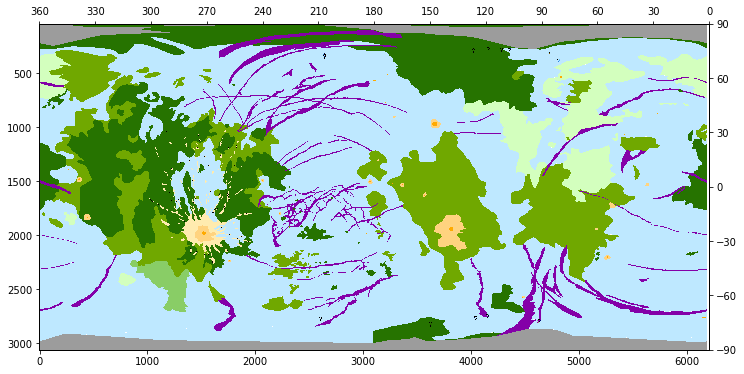

In [58]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.imshow(img)

ax1 = ax.twinx().twiny()
ax1.set_xlim(360, 0)
ax1.set_xticks(np.linspace(0, 360, 13))
ax1.set_ylim(-90, 90)
ax1.set_yticks(np.linspace(-90, 90, 7));

In [60]:
h, w, _ = img.shape

def jlat(lat):
    """Convert latitude coodinate into pixel y-coordinate."""
    return (90 - lat) / 180 * h

assert jlat(90) == 0, 'Invalid formula for 90'
assert jlat(-90) == h, 'Invalid formula for -90'
assert jlat(0) == 1/2 * h, 'Invalid formula for 0'
assert jlat(45) == 1/4 * h, 'Invalid formula for 45'
assert jlat(-45) == 3/4 * h, 'Invalid formula for -45'

In [75]:
def ilon(lon):
    """Convert west longitude coodinate into pixel x-coordinate."""
    return (360 - lon % 360)/ 360 * w if lon != 360 else 0

assert ilon(0) == w, 'Invalid formula for 0'
assert ilon(360) == 0, 'Invalid formula for 360'
assert ilon(180) == 1/2 * w, 'Invalid formula for 180'
assert ilon(90) == 3/4 * w , f'Invalid formula for 90'
assert ilon(270) == 1/4 * w , f'Invalid formula for 270'
assert ilon(-180) == 1/2 * w, 'Invalid formula for 180'
assert ilon(-90) == 1/4 * w, 'Invalid formula for -90'

In [101]:
def ij(lon, lat):
    """Convert west longitude coodinate into pixel x-coordinate."""
    return int(ilon(lon)), int(jlat(lat))

ij(180, 0)

(3104, 1552)

In [114]:
def map_color(lon, lat):
    i, j = ij(lon, lat)
    return img[j, i]

map_color(180, 0)

array([0.74509805, 0.9098039 , 1.        ], dtype=float32)

In [115]:
def rgb(lon, lat):
    return f'rgb{tuple(int(100 * color) for color in map_color(lon, lat))}'

# rgb(2.658, 4.368)
rgb(180, 0)

'rgb(74, 90, 100)'

In [119]:
a = {'b': 1, 'c': 2}

In [121]:
a['c']

2

In [116]:
legend = {
    'rgb(14, 45, 0)': 'Plain',
    'rgb(74, 90, 100)': 'High albedo',
}

In [122]:
legend['rgb(14, 45, 0)']

'Plain'

In [123]:
def unit(lon, lat):
    return legend[rgb(lon, lat)]

unit(180, 0)

'High albedo'

In [129]:
jlat(90)

0.0

In [130]:
jlat([90])

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [131]:
jlat([[90]])

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [1]:
from ssi.geol import EUROPA

ModuleNotFoundError: No module named 'ssi.geol'